<h1 style="color:blue;">TITANIC SURVIVAL PREDICTION</h1>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h3>Loading dataset</h3>

In [2]:
df=pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<h3>Understanding dataset</h3>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h3>Preprocessing the data</h3>

In [6]:
df.drop(columns=['Cabin'],inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


<h4>Handling missing value</h4>

In [7]:
medianage=df['Age'].median()
medianage

28.0

In [8]:
df['Age']=df['Age'].fillna(medianage)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [9]:
df['Age'].isnull().sum()

0

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [11]:
modeembarked=df['Embarked'].mode()[0]
modeembarked

'S'

In [12]:
df['Embarked']=df['Embarked'].fillna(modeembarked)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [13]:
df['Embarked'].isnull().sum()

0

<h4>Converting categorical to numeric data</h4>

In [14]:
cat2numsex=pd.get_dummies (df.Sex)
cat2numsex

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [15]:
cat2numembarked=pd.get_dummies (df.Embarked)
cat2numembarked

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [16]:
data=pd.concat([df,cat2numsex,cat2numembarked],axis='columns')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,False,True,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,True,False,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,True,False,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,False,True,True,False,False


In [17]:
data.drop(columns=['Sex','Embarked','male','Q'],inplace=True)
data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,female,C,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,True,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,True,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,True,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,False,True,False


In [18]:
data.drop(columns=['PassengerId','Name','Ticket'],inplace=True)
data

,Survived,Pclass,Age,SibSp,Parch,Fare,female,C,S
0,0,3,22.0,1,0,7.2500,False,False,True
1,1,1,38.0,1,0,71.2833,True,True,False
2,1,3,26.0,0,0,7.9250,True,False,True
3,1,1,35.0,1,0,53.1000,True,False,True
4,0,3,35.0,0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,False,False,True
887,1,1,19.0,0,0,30.0000,True,False,True
888,0,3,28.0,1,2,23.4500,True,False,True
889,1,1,26.0,0,0,30.0000,False,True,False


<h3>visualization of  dataset</h3>

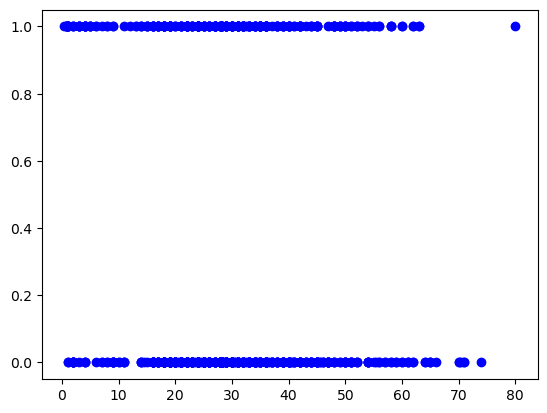

In [19]:
plt.scatter(data.Age,data.Survived,marker='o',color='blue')
plt.show()

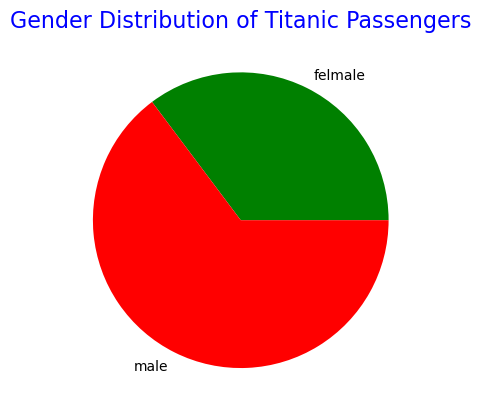

In [20]:
totalfem=data['female'].sum()
totalmale=891-totalfem
plt.pie([totalfem,totalmale],labels=['felmale','male'],colors=['green','red'])
plt.title("Gender Distribution of Titanic Passengers", fontsize=16, color='blue')
plt.show()

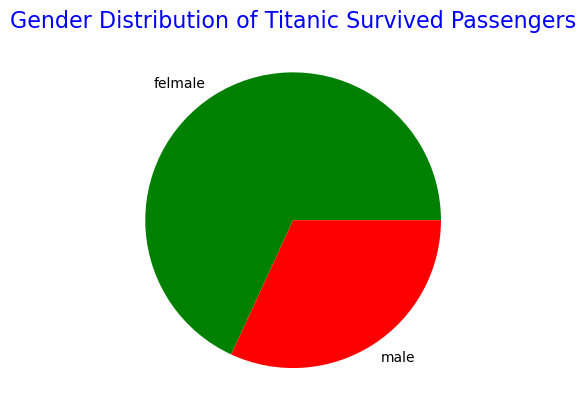

In [21]:
femsurv=df[(df['Sex'] == 'female') & (df['Survived'] == 1)].shape[0]
malesurv=df[(df['Sex'] == 'male') & (df['Survived'] == 1)].shape[0]
plt.pie([femsurv,malesurv],labels=['felmale','male'],colors=['green','red'])
plt.title("Gender Distribution of Titanic Survived Passengers", fontsize=16, color='blue')
plt.show()

In [22]:
AgeGroup = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], 
                        labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
AgeGroup

0      Young Adult
1            Adult
2      Young Adult
3      Young Adult
4      Young Adult
          ...     
886    Young Adult
887    Young Adult
888    Young Adult
889    Young Adult
890    Young Adult
Name: Age, Length: 891, dtype: category
Categories (5, object): ['Child' < 'Teen' < 'Young Adult' < 'Adult' < 'Senior']

Text(0.5, 1.0, 'Survival Count by Age Group')

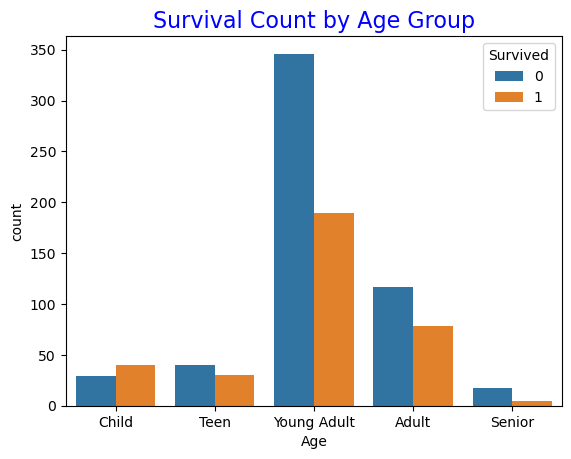

In [23]:
import seaborn as sns
sns.countplot(x=AgeGroup, hue='Survived', data=df)
plt.title("Survival Count by Age Group", fontsize=16, color='blue')

Text(0.5, 1.0, 'Titanic Passenger Count by Port of Embarkation')

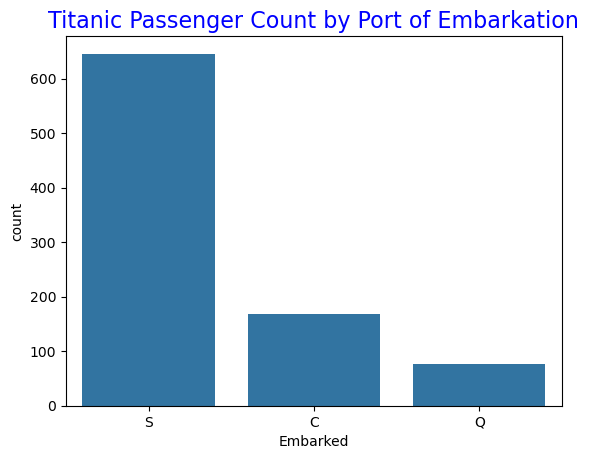

In [24]:
sns.countplot(x='Embarked', data=df)
plt.title("Titanic Passenger Count by Port of Embarkation", fontsize=16, color='blue')

Text(0.5, 1.0, 'Survival Count by Port of Embarkation')

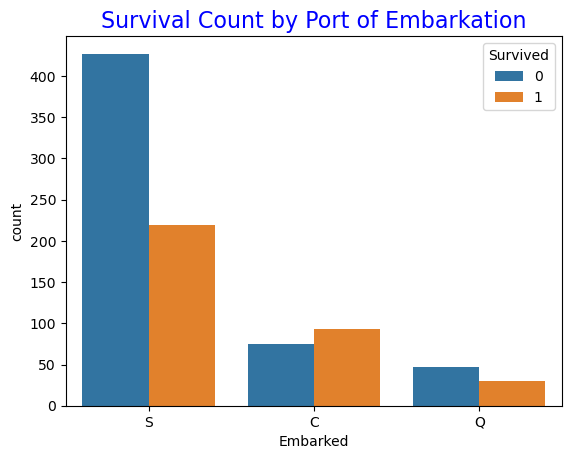

In [25]:
sns.countplot(x='Embarked',hue='Survived', data=df)
plt.title("Survival Count by Port of Embarkation", fontsize=16, color='blue')

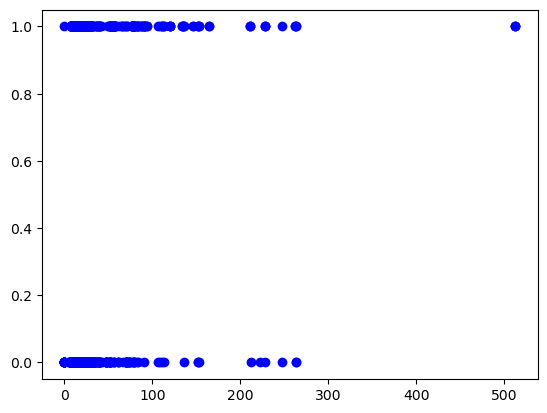

In [26]:
plt.scatter(data.Fare,data.Survived,marker='o',color='blue')
plt.show()

<h4>Spliting data into train and test dataset</h4>

In [27]:
x=data.drop(columns=['Survived'])
x

,Pclass,Age,SibSp,Parch,Fare,female,C,S
0,3,22.0,1,0,7.2500,False,False,True
1,1,38.0,1,0,71.2833,True,True,False
2,3,26.0,0,0,7.9250,True,False,True
3,1,35.0,1,0,53.1000,True,False,True
4,3,35.0,0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,False,False,True
887,1,19.0,0,0,30.0000,True,False,True
888,3,28.0,1,2,23.4500,True,False,True
889,1,26.0,0,0,30.0000,False,True,False


In [28]:
y=data.Survived
y


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)


<h3>Model training</h3>

<h4>Logistic Regression</h4>

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

<h4>Survival Prediction</h4>

In [32]:
model.predict(x_test)

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1])

In [33]:
y_test

554    1
188    0
423    0
252    0
189    0
      ..
475    0
179    0
71     0
604    1
829    1
Name: Survived, Length: 90, dtype: int64

<h4>Predicted Survival Probabilities</h4>

In [35]:
model.predict_proba(x_test)

array([[0.36912819, 0.63087181],
       [0.93789146, 0.06210854],
       [0.49598308, 0.50401692],
       [0.78223499, 0.21776501],
       [0.92626075, 0.07373925],
       [0.19276856, 0.80723144],
       [0.60821486, 0.39178514],
       [0.87502058, 0.12497942],
       [0.87837383, 0.12162617],
       [0.79364519, 0.20635481],
       [0.87904367, 0.12095633],
       [0.67972836, 0.32027164],
       [0.63703833, 0.36296167],
       [0.98671372, 0.01328628],
       [0.90675423, 0.09324577],
       [0.64038974, 0.35961026],
       [0.23629313, 0.76370687],
       [0.04226583, 0.95773417],
       [0.05989315, 0.94010685],
       [0.23967746, 0.76032254],
       [0.42721888, 0.57278112],
       [0.93327104, 0.06672896],
       [0.39083878, 0.60916122],
       [0.63613121, 0.36386879],
       [0.31070706, 0.68929294],
       [0.12283238, 0.87716762],
       [0.93085198, 0.06914802],
       [0.93577145, 0.06422855],
       [0.36708521, 0.63291479],
       [0.23606299, 0.76393701],
       [0.

In [36]:
y_pred=model.predict(x_test)

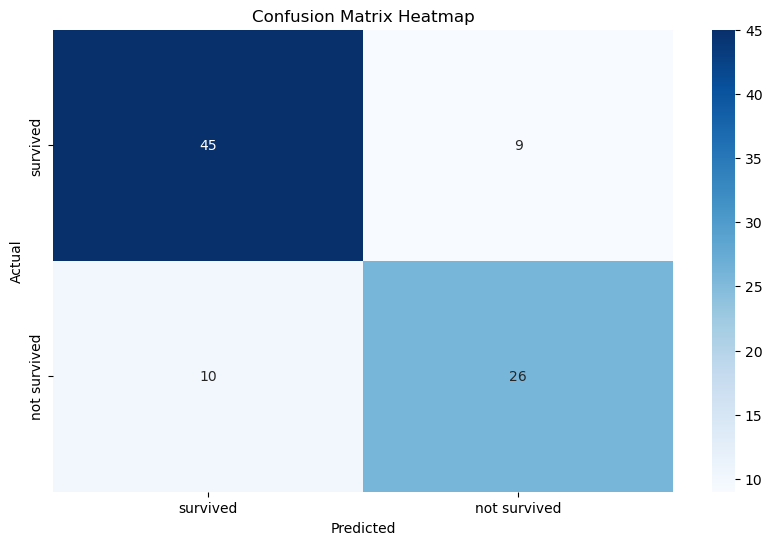

In [37]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['survived', 'not survived'],
            yticklabels=['survived', 'not survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

<h4>Model Accuracy</h4>

In [38]:
Accuracy=model.score(x_test,y_test)

In [39]:
print(f"The model achieved {Accuracy*100} % accuracy on the test set.")

The model achieved 78.88888888888889 % accuracy on the test set.
